<hr>
<b><font color='red'>Ejercicio 01</font></b>  

Lee el archivo "super.csv", haz que se muestren por pantalla los 10 primeros registros


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

super = pd.read_csv('super.csv')
super.head(10)


,número de artículos,precio,sexo,día
0,27,42.15,Mujer,jueves
1,26,60.26,Mujer,jueves
2,20,28.12,Hombre,miércoles
3,24,47.48,Hombre,domingo
4,17,50.88,Mujer,sábado
5,13,29.12,Mujer,sábado
6,25,69.48,Hombre,sábado
7,22,40.45,Mujer,sábado
8,15,47.58,Mujer,sábado
9,15,31.70,Mujer,sábado


In [3]:
#¿Cuántos artículos de media se comprán? ¿Cuál es su precio?

print("Media de artículos: " + str(super['número de artículos'].mean()))
print("Media de precio: " + str(super['precio'].mean()))


Media de artículos: 20.667
Media de precio: 41.659229999999994


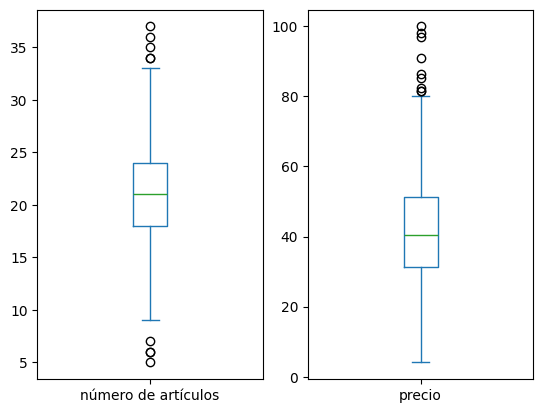

In [5]:
#Muestra los diagramas de cajas
super.plot(kind='box', subplots=True, layout=(1,2), sharex=False, sharey=False)
plt.show()

<Axes: >

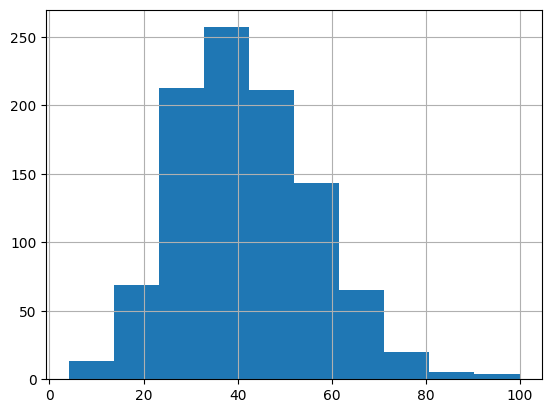

In [6]:
#haz un histograma del precio
super.precio.hist()

<Axes: xlabel='número de artículos', ylabel='precio'>

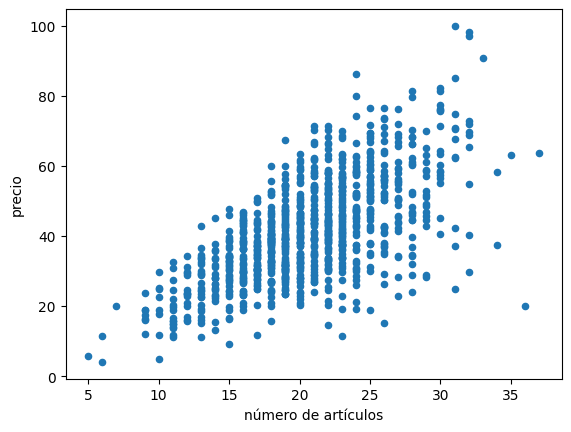

In [7]:
#muestra un gráfico (scatter) del número de artículos respecto al precio
super.plot.scatter('número de artículos', 'precio')

In [8]:
#Encuentra los registros que se han gastado más que la media, haz que salgan por pantalla los 5 primeros registros 
media = super['precio'].mean()
sobre_media = super[super['precio'] > media]
sobre_media.head(5)

,número de artículos,precio,sexo,día
0,27,42.15,Mujer,jueves
1,26,60.26,Mujer,jueves
3,24,47.48,Hombre,domingo
4,17,50.88,Mujer,sábado
6,25,69.48,Hombre,sábado


In [9]:
#¿Cuántas compras se han hecho con un precio mayor de 50 €, por hombres y el lunes?
sobre_cincuenta = super[ (super['precio'] > 50) & (super['sexo'] == 'Hombre') & (super['día'] == 'lunes')]
sobre_cincuenta.precio.count()

12

<Axes: xlabel='día'>

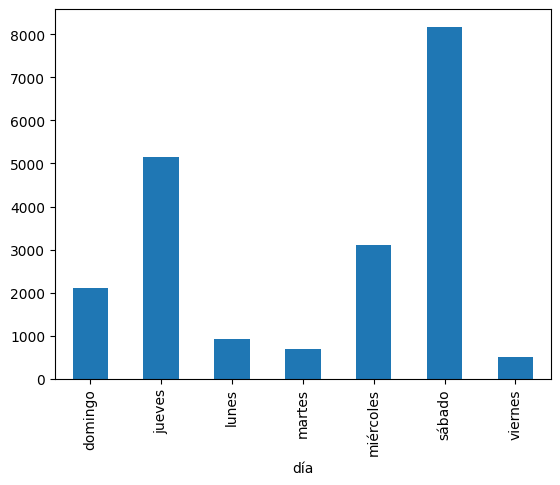

In [10]:
#crea un histograma en que se muestren la distribución de las compras por días
sum = super.groupby('día').sum()
sum['número de artículos'].plot(kind = 'bar')

In [11]:
#crea una nueva columna en la que se muestre el valor medío de los artículos comprados, muestra los 5 primeros varlores
super['valor medio'] = super['precio'] / super['número de artículos']
super.head(5)

,número de artículos,precio,sexo,día,valor medio
0,27,42.15,Mujer,jueves,1.561111
1,26,60.26,Mujer,jueves,2.317692
2,20,28.12,Hombre,miércoles,1.406000
3,24,47.48,Hombre,domingo,1.978333
4,17,50.88,Mujer,sábado,2.992941


<Axes: >

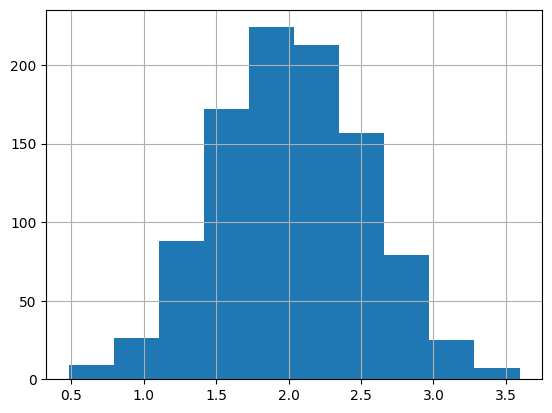

In [12]:
#muestra un histograma del valor medio
super['valor medio'].hist()

In [13]:
#cual es el valor medio
super['valor medio'].mean()

2.018041543350072

Analiza la correlacción, obtinenes alguna conclusión.

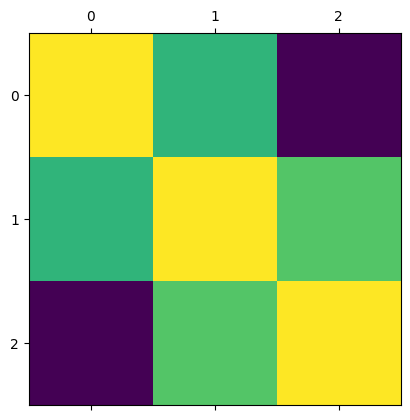

Cuántos más artículos menor valor medio, el precio y el valor medio son los elementos con más correlación


In [14]:
num0 = super.drop('sexo', axis=1)
num = num0.drop('día', axis=1)
plt.matshow(num.corr())
plt.show()
print("Cuántos más artículos menor valor medio, el precio y el valor medio son los elementos con más correlación")

<hr>
<b><font color='red'>Ejercicio 02</font></b>  

Crea un archivo llamado calendario.xlsx. Haz que tenga 12 hojas, llamadas
["enero","febrero","marzo","abril","mayo","junio","julio","agosto","septiembre","octubre","noviembre","diciembre"]
con los siguientes días por hoja
[31,28,31,30,31,30,31,31,30,31,30,31]
haz que apareza un calendario de ese mes en cada hoja como creas conveniente, es decir:

    L M X J V S D
    1 2 3 4 5 6 7
    ....
    
    o
    
    1 2 3 4 5 6 ....31
    
    o
    
    1
    2
    3
    4
    .
    .
    

In [18]:
writer = pd.ExcelWriter('calendario.xlsx')

cal28 = pd.DataFrame(data = {
    "Lunes": [1,8,15,22],
    "Martes": [2,9,16,23],
    "Miercoles": [3,10,17,24],
    "Jueves": [4,11,18,25],
    "Viernes": [5,12,19,26],
    "Sábado": [6,13,20,27],
    "Domingo": [7,14,21,28]
})
cal30 = pd.DataFrame(data = {
    "Lunes": [1,8,15,22,29],
    "Martes": [2,9,16,23,30],
    "Miercoles": [3,10,17,24,0],
    "Jueves": [4,11,18,25,0],
    "Viernes": [5,12,19,26,0],
    "Sábado": [6,13,20,27,0],
    "Domingo": [7,14,21,28,0]
})
cal31 = pd.DataFrame(data = {
    "Lunes": [1,8,15,22,29],
    "Martes": [2,9,16,23,30],
    "Miercoles": [3,10,17,24,31],
    "Jueves": [4,11,18,25,0],
    "Viernes": [5,12,19,26,0],
    "Sábado": [6,13,20,27,0],
    "Domingo": [7,14,21,28,0]
})

cal31.to_excel(writer, sheet_name="Enero", index=False)
cal28.to_excel(writer, sheet_name="Febrero", index=False)
cal31.to_excel(writer, sheet_name="Marzo", index=False)
cal30.to_excel(writer, sheet_name="Abril", index=False)
cal31.to_excel(writer, sheet_name="Mayo", index=False)
cal30.to_excel(writer, sheet_name="Junio", index=False)
cal31.to_excel(writer, sheet_name="Julio", index=False)
cal31.to_excel(writer, sheet_name="Agosto", index=False)
cal30.to_excel(writer, sheet_name="Septiembre", index=False)
cal31.to_excel(writer, sheet_name="Octubre", index=False)
cal30.to_excel(writer, sheet_name="Noviembre", index=False)
cal31.to_excel(writer, sheet_name="Diciembre", index=False)

writer.close()

<hr>
<b><font color='red'>Ejercicio 03</font></b>  

Para extraer información financiera utilizaremos la libreria  yfinance

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import yfinance as yf

In [13]:
from pytickersymbols import PyTickerSymbols
stock_data = PyTickerSymbols()
#Obtener los mercados
stock_data.get_all_indices()

['S&P 500',
 'NASDAQ 100',
 'MOEX',
 'DAX',
 'CAC 40',
 'OMX Helsinki 25',
 'CDAX',
 'IBEX 35',
 'TECDAX',
 'OMX Stockholm 30',
 'CAC Mid 60',
 'FTSE 100',
 'S&P 600',
 'SDAX',
 'EURO STOXX 50',
 'AEX',
 'Switzerland 20',
 'S&P 100',
 'MDAX',
 'BEL 20',
 'DOW JONES']

In [14]:
ibex35_stocks = stock_data.get_stocks_by_index('IBEX 35')
#ver las empresas que cotizan en el mercado del ibex35
for i in list(ibex35_stocks):
    print(i['symbol'],i['name'])

IAG International Consolidated Airlines Group SA
MT ArcelorMittal
ANA Acciona SA
ACX Acerinox SA
ACS Actividades de Construcción y Servicios SA
AENA Aena SA
AMS Amadeus IT Group SA
BBVA Banco Bilbao Vizcaya Argentaria SA
BKT Bankinter SA
CABK CaixaBank SA
CLNX Cellnex Telecom SA
ELE Endesa SA
FER Ferrovial SA
GRF Grifols SA
IBE Iberdrola SA
ITX Industria de Diseño Textil SA
IDR Indra Sistemas SA
COL Inmobiliaria Colonial, SOCIMI SA
MEL Meliá Hotels International
MRL MERLIN Properties SOCIMI SA
NTGY Naturgy Energy Group SA
REE Red Eléctrica Corporación SA
REP Repsol SA
SGRE Siemens Gamesa Renewable Energy SA
TEF Telefónica
SAB Banco de Sabadell, S.A.
SAN Banco Santander, S.A.
ENG Enagás, S.A.
FDR Fluidra
MAP Mapfre, S.A.
PHM Pharma Mar S.A.
SLR Solar power in Spain
ROVI Laboratorios Rovi


In [15]:
#Si queremos los calores de CaixaBanck
start='2021-01-01'
end='2021-06-01'
df =  yf.download('CABK',start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,1.05,1.05,1.05,1.05,1.05,0
2021-01-05,1.03,1.05,1.03,1.05,1.05,25651
2021-01-06,1.04,1.05,1.04,1.05,1.05,7640
2021-01-07,1.05,1.05,1.04,1.04,1.04,19040
2021-01-11,1.04,1.04,1.02,1.04,1.04,52270


Crea una nueva columna llamada que muestre el valor medio, es decir (Close+Open)/2 y haz una gráfica que muestre los tres valores:

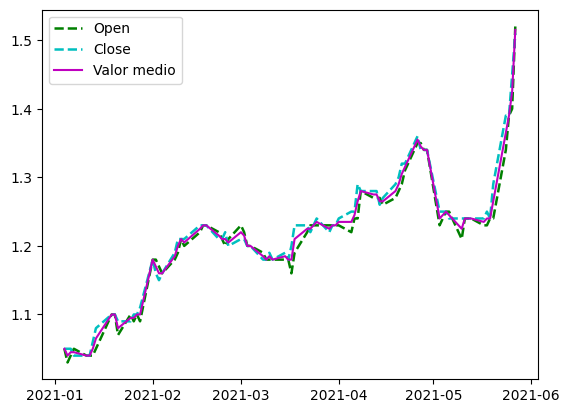

In [16]:
df['Valor medio'] = (df['Open'] + df['Close']) / 2
plt.plot(df['Open'],linestyle = '--',linewidth = '1.8',color='g',label='Open')
plt.plot(df['Close'],linestyle = '--',linewidth = '1.8',color='c',label='Close')
plt.plot(df['Valor medio'], linewidth = '1.5',color='m',label='Valor medio')
plt.legend()

<img src="PAND1.png">  

Utiliza, hlines, fill_between de la libreria matplotlib para obtener el siguiente resultado:

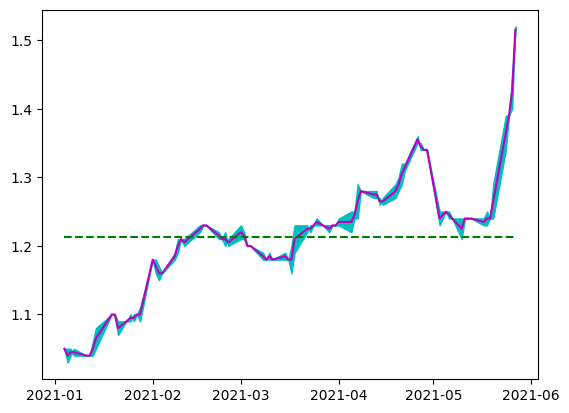

In [17]:
df.index
plt.fill_between(df.index, df['Open'],df['Close'], color='c')
plt.plot(df['Valor medio'], linewidth = '1.5',color='m',label='Valor medio')
plt.hlines(df['Valor medio'].mean(), df.index[0], df.index[-1] , linestyle= 'dashed', color='g')


<img src="PAND2.png">  

crea una nueva gráfica en la que se muestre la diferencia entre la apertura y el cierre, así como la media 

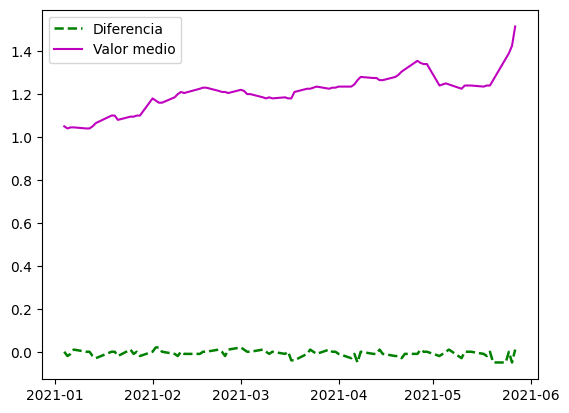

In [18]:
plt.plot(df['Open']-df['Close'],linestyle = '--',linewidth = '1.8',color='g',label='Diferencia')
plt.plot(df['Valor medio'], linewidth = '1.5',color='m',label='Valor medio')
plt.legend()

<img src="PAND3.png">

In [19]:
#fíjate, si tomamos la media de los valeres de TEL
df =  yf.download('TEL',start,end)
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-01-04,121.190002,122.410004,118.980003,120.300003,114.605339,1386500
2021-01-05,120.669998,122.849998,120.389999,122.610001,116.805984,1191400
2021-01-06,125.000000,127.889999,124.449997,126.129997,120.159355,2306100
2021-01-07,127.160004,129.470001,126.800003,128.660004,122.569595,1875000
2021-01-08,129.889999,131.750000,128.240005,130.470001,124.293900,2301300


<img src="PAND4.png">

In [20]:
#Si creamos un nuevo df y metemos los vaores medios de TEL
df['TEL']=(df['Close']+df['Open'])/2
df_ibex35=pd.DataFrame(df['TEL'])
df_ibex35.head()

,TEL
Date,
2021-01-04,120.745003
2021-01-05,121.639999
2021-01-06,125.564999
2021-01-07,127.910004
2021-01-08,130.180000


In [21]:
#ahora metemos los de AENA
df =  yf.download('CABK',start,end)
df.head()
df['CABK']=(df['Close']+df['Open'])/2
df_ibex35['CABK']=df['CABK']
df_ibex35.head()

[*********************100%%**********************]  1 of 1 completed


,TEL,CABK
Date,,
2021-01-04,120.745003,1.050
2021-01-05,121.639999,1.040
2021-01-06,125.564999,1.045
2021-01-07,127.910004,1.045
2021-01-08,130.180000,NaN


In [22]:
#Haz que se descarque los valores de la siguiente lista 
lista=['MT', 'AMS', 'BBVA', 'BKT', 'TEF', 'SAN', 'ENG']
#Haz que los guarde dentro de una dataframe llamado lista_ibex35
df = yf.download('IAG',start,end)
lista_ibex35 = pd.DataFrame(df['Close'])

for i in lista:
    df = yf.download(i,start,end)
    lista_ibex35[i] = df['Close']


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


<Axes: xlabel='Date'>

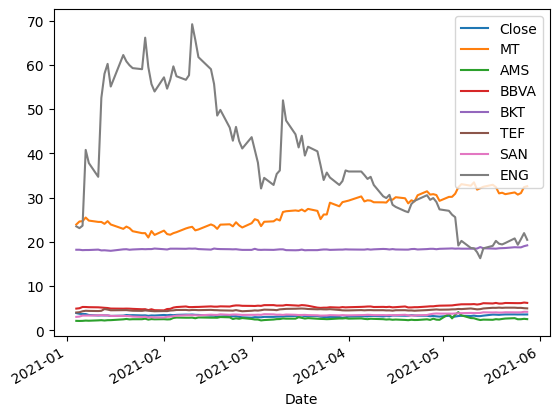

In [23]:
#Visualizalo descomentando la siguiente instrucción
lista_ibex35.plot()

Ejemplo de salida:

<img src="PAND5.png">  

<Axes: >

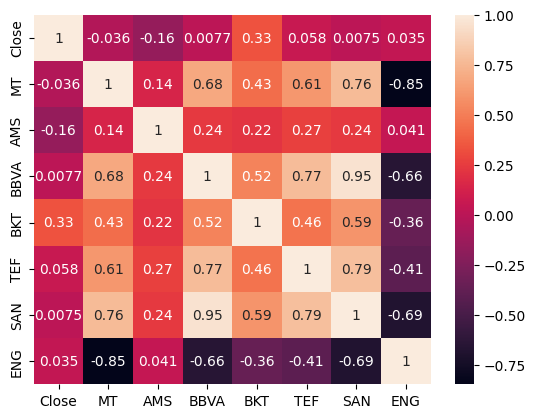

In [24]:
#Crea un gráfico de la correlación descomentando la siguiente instrucción
sns.heatmap(lista_ibex35.corr(), annot = True)

<img src="PAND6.png">

Reponde a la siguientes preguntas:
- ¿Cuáles son las empresas que estan más correlaccionadas?
- ¿Cuál crees que es el motivo?

In [ ]:
- Las más correlacionadas son BBVA y Santander, ambas son bancos y tiene sentido que tengan comportamientos similares
